## Лабораторная работа №6
### Начально-краевые задачи для дифференциального уравнения гиперболического типа

Сорокин Никита, М8О-403Б-20

### Задание
Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $ U(x, t) $.

Вариант 2:

$$
\begin{cases}
\frac{\partial^2 u}{\partial t^2} = a^2 \frac{\partial^2 u}{\partial x^2}, \,\, a^2>0 \\
u_x(0, t) - u(0, t) = 0  \\
u_x(\pi, t) - u(\pi, t) = 0 \\
u(x, 0) = sin(x) + cos(x)   \\
u_t(x, 0) = -a (sin(x) + cos(x))
\end{cases}
$$

Аналитическое решение: 

$$
U(x, t) = sin(x - at) + cos(x + at)
$$

In [99]:
import sys 
sys.path

sys.path.insert(0, r"c:\Users\никита\Desktop\учеба\чм\modules")

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

%matplotlib inline

from LinearAlgebra import *

In [101]:
a = 1

x_begin = 0
x_end = np.pi

t_begin = 0
t_end = 1

h = 0.1
tau = h / (2 * a)
sigma = a**2 * tau**2 / h**2
sigma

0.25

In [102]:
def check_sigma(sigma):
    res = True if sigma <= 1 else False
    return res

check_sigma(sigma)

True

Функция для вычисления погрешности - максимального модуля ошибки

In [103]:
def max_abs_error(A, B):
    assert A.shape == B.shape
    return abs(A - B).max()

И среднего модуля ошибки:

In [104]:
def mean_abs_error(A, B):
    assert A.shape == B.shape
    return abs(A - B).mean()

In [105]:
def solution(x, t, a=1):
    u = np.sin(x - a * t) + np.cos(x + a * t)
    return u 

def phi_0(t, a=1):
    return 0

def phi_1(t, a=1):
    return 1
    
def psi_1(x, a=1):
    return np.sin(x) + np.cos(x)

def psi_2(x, a=1):
    return -a * (np.sin(x) + np.cos(x))

def dd_psi_1(x, a=1):
    return - (np.sin(x) + np.cos(x))

### Начальные условия

$$
u_j^0 = \psi_1(x_j), \,\, j = \overline{0, N}
$$

### 1 порядок

$$
\frac{u_j^1 - u_j^0}{\tau} = \psi_2(x_j), \\[6pt]
u_j^1 = \psi_1(x_j) + \psi_2(x_j) \tau, \, j = \overline{0, N}
$$

### 2 порядок

$$

u_j^1 = u(x_j, 0 + \tau) = u_j^0+ \frac{\partial u}{\partial t} \Big|_j^0 \tau + \frac{\partial^2 u}{\partial t^2} \Big|_j^0 \frac{\tau^2}{2} + O(\tau^3), \\[8pt]

\frac{\partial^2 u}{\partial t^2} \Big|_{j}^{0} = a^2 \frac{\partial^2 u}{\partial x^2} \Big|_{j}^{0} = a^2 \psi_1''(x_j), \\[8pt]

u_j^1 = \psi_1(x_j) + \psi_2(x_j) \tau + \frac{a^2 \tau^2}{2} \psi_1''(x_j)
$$

In [106]:
def get_initial_values(x_begin, x_end, h, tau, psi_1, psi_2, dd_psi_2, order):

    x = np.arange(x_begin, x_end + h, h)
    u = np.zeros((2, x.size))

    u[0, :] = psi_1(x)

    if order == 1:
        u[1, :] = psi_1(x) + psi_2(x) * tau

    if order == 2:
        u[1, :] = psi_1(x) + psi_2(x) * tau + a**2 * tau**2 * dd_psi_1(x) / 2

    return u

### Граничные условия

###  2 точки, 1 порядок

$$
\phi_0(t^{k + 1}) = \frac{u_1^{k + 1} - u_0^{k + 1}}{h} - u_0^{k + 1} = 0 \\[6pt]
u_0^{k + 1} = \frac{u_1^{k + 1}}{1 + h}
$$

Аналогично получается:

$$
u_N^{k + 1} = \frac{u_{N - 1}^{k + 1}}{1 - h}
$$

###  3 точки, 2 порядок

$$
\phi_0(t^{k + 1}) = \frac{-3 u_0^{k + 1} + 4 u_1^{k + 1} - u_2^{k + 1}}{h} - u_0^{k + 1} = 0 \\[6pt]
u_0^{k + 1} = \frac{-4 u_1^{k + 1} + u_2^{k + 1}}{-3 - 2h}
$$

Аналогично получается:

$$
u_N^{k + 1} = \frac{-u_{N - 2}^{k + 1} + 4 u_{N - 1}^{k + 1}}{3 - 2h}
$$


###  2 точки, 2 порядок

$$
u_1^{k + 1} = u(0 + h, t^{k + 1}) = u_0^{k + 1} + \frac{\partial u}{\partial x} \Big|_0^{k + 1} h + \frac{\partial^2 u}{\partial x^2} \Big|_0^{k + 1} \frac{h^2}{2} + O(h^3) \\[8pt]

\frac{\partial^2 u}{\partial x^2} \Big|_{0, \, N}^{k + 1} = \frac{1}{a^2} \frac{\partial^2 u}{\partial t^2} \Big|_{0, \, N}^{k + 1} \\[8pt]

\frac{\partial u}{\partial x} \Big|_0^{k + 1} = \frac{u_1^{k + 1} - u_0^{k + 1}}{h} - \frac{h}{2 a^2} \frac{u_0^{k + 1} - 2u_0^{k} + u_0^{k - 1}}{\tau^2} \\[8pt]

u_0^{k + 1} = \frac{u_1^{k + 1} + \frac{1}{\sigma} u_0^k - \frac{1}{2 \sigma} u_0^{k - 1}}{1 + h + 1 / 2\sigma}

$$

Аналогично получается:

$$
u_N^{k + 1} = \frac{u_{N - 1}^{k + 1} + \frac{1}{\sigma} u_N^k - \frac{1}{2 \sigma} u_N^{k - 1}}{1 - h + 1 / 2\sigma}
$$

In [107]:
def get_boundary_values(u, h, sigma, type):

    if type == (2, 1):
        u_0 = u[-1, 1] / (1 + h)
        u_N = u[-1, -2] / (1 - h)

    if type == (3, 2):
        u_0 = (-4 * u[-1, 1] + u[-1, 2]) / (-3 - 2 * h)
        u_N = (-u[-1, -3] + 4 * u[-1, -2]) / (3 - 2 * h)

    if type == (2, 2):
        u_0 = (u[-1, 1] + u[-2, 0] / sigma - u[-3, 0] / (2 * sigma)) / (1 + h + 1 / (2 * sigma))
        u_N = (u[-1, -2] + u[-2, -1] / sigma - u[-3, -1] / (2 * sigma)) / (1 - h + 1 / (2 * sigma))

    return u_0, u_N

In [108]:
def get_boundary_coefficients(u, h, sigma, type):

    A = np.zeros((2, 2))
    b = np.zeros(2)

    if type == (2, 1):

        A[0, 0] = (1 + 2 * sigma - sigma / (1 + h))
        A[0, 1] = -sigma
        A[-1, -2] = -sigma
        A[-1, -1] = (1 + 2 * sigma - sigma / (1 - h))
        b[0] = 2 * u[-1, 1] - u[-2, 1]
        b[-1] = 2 * u[-1, -2] - u[-2, -2]

    if type == (3, 2):
        
        A[0, 0] = (-3 - 2 * h) * (1 + 2 * sigma) + 4 * sigma
        A[0, 1] = -sigma + (3 + 2 * h) * sigma
        A[-1, -2] = -(3 - 2 * h) * sigma + sigma
        A[-1, -1] = (3 - 2 * h) * (1 + 2 * sigma) - 4 * sigma
        b[0] = (-3 - 2 * h) * (2 * u[-1, 1] - u[-2, 1])
        b[-1] = (3 - 2 * h) * (2 * u[-1, -2] - u[-2, -2])

    if type == (2, 2):

        A[0, 0] = (1 + 2 * sigma) * (1 + h + 1 / (2 * sigma)) - sigma
        A[0, 1] = -sigma * (1 + h + 1 / (2 * sigma))
        A[-1, -2] = -sigma * (1 - h + 1 / (2 * sigma))
        A[-1, -1] = (1 + 2 * sigma) * (1 - h + 1 / (2 * sigma)) - sigma
        b[0] = (1 + h + 1 / (2 * sigma)) * (2 * u[-1, 1] - u[-2, 1]) + u[-1, 0] - u[-2, 0] / 2
        b[-1] = (1 - h + 1 / (2 * sigma)) * (2 * u[-1, -2] - u[-2, -2]) + u[-1, -1] - u[-2, -1] / 2


    return A[0, 0], A[0, 1], A[-1, -2], A[-1, -1], b[0], b[-1]

### Точное решение


Дано по условию:

In [109]:
def get_analytical_solution(x_begin, x_end, t_begin, t_end, h, tau, a):

    x = np.arange(x_begin, x_end + h, h)
    t = np.arange(t_begin, t_end + tau, tau)

    u = np.zeros((t.size, x.size))
    for j in range(x.size):
        for k in range(t.size):
            u[k, j] = solution(x[j], t[k], a)
    
    return u

In [1]:
u_exact = get_analytical_solution(x_begin, x_end, t_begin, t_end, h, tau, a)

NameError: name 'get_analytical_solution' is not defined

### Явная схема


$$
\frac{\mathit{u}_{\mathit{j}}^{k+1}-2\mathit{u}_{\mathit{j}}^{k} + u_{j}^{k-1}}{\tau^2}
 = 
a^{2} \frac{ {\mathit{u}_{\mathit{j+1}}^{k}-2\mathit{u}_{\mathit{j}}^{k}+u}_{j-1}^{k}}{h^{2}}+O\! \left(h^{2}+\tau^{2} \right)

$$

Выразим $ u_j^{k+1} $ и получим:

$$ u_j^{k+1} = \sigma u_{j-1}^k + 2(1-\sigma)u_j^k + \sigma u_{j+1}^k - u_{j}^{k - 1} $$


где $ \sigma = \frac{a\tau^2}{h^2}$

In [111]:
def explicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_2, order, type):

    sigma = a**2 * tau**2 / h**2
    x = np.arange(x_begin, x_end + h, h)
    t = np.arange(t_begin, t_end + tau, tau)
    u = np.zeros((t.size, x.size))

    u[0:2, :] = get_initial_values(x_begin, x_end, h, tau, psi_1, psi_2, dd_psi_2, order)

    for k in range(1, t.size - 1):

        u[k + 1, 1:-1] = sigma * u[k, 0:-2] + 2 * (1 - sigma) * u[k, 1:-1] + sigma * u[k, 2:] - u[k - 1, 1:-1]
        u[k + 1, 0], u[k + 1, -1] = get_boundary_values(u[k - 1:k + 2, :], h, sigma, type)
            
    return u

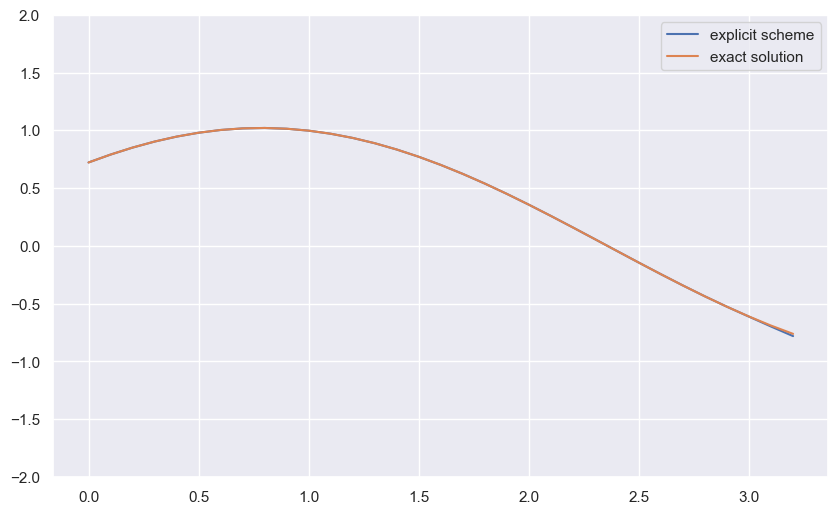

In [112]:
order = 2
type = (2, 2)

u_explicit = explicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_1, order, type)

x = np.arange(x_begin, x_end + h, h)
t = np.arange(t_begin, t_end + tau, tau)

fig, axs = plt.subplots(figsize=(10, 6))

i = 5
line1, = axs.plot(x, u_explicit[i, :], label="explicit scheme")
line3, = axs.plot(x, u_exact[i, :], label="exact solution")

plt.ylim(-2, 2)
plt.legend()


### Неявная схема


$$
\frac{\mathit{u}_{\mathit{j}}^{k+1}-2\mathit{u}_{\mathit{j}}^{k} + u_{j}^{k-1}}{\tau^2}
 = 
a^{2} \frac{ {\mathit{u}_{\mathit{j+1}}^{k+1}-2\mathit{u}_{\mathit{j}}^{k+1}+u}_{j-1}^{k+1}}{h^{2}}+O\! \left(h^{2}+\tau^2 \right)

$$

Выражаем $ u_{j}^{k + 1} $ и получаем СЛАУ для трехдиагональной матрицы, которую можно решать методом прогонки написанным ранее:

$$

\begin{equation*}
 \begin{cases}
   b_1u_1^{k+1}+c_1u_2^{k+1}=d_1, ~~~j=1, 
   \\
   a_ju_{j-1}^{k+1}+b_ju_j^{k+1}+c_ju_{j+1}^{k+1}=d_j, ~~~j=2\dots N-2,
   \\
   a_{N-1}u_{N-2}^{k+1}+b_{N-1}u_{N-1}^{k+1}=d_{N-1}, ~~~j=N-1.
 \end{cases}
\end{equation*}

$$

$$ 
\begin{align}
a_j &=c_j= -\sigma \\
b_j &= 1 + 2\sigma \\
d_j &= 2 u_j^k - u_j^{k - 1}, \,\, j=2 \dots N-2 \\
\end{align}
$$


In [113]:
def implicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_1, order, type):

    sigma = a**2 * tau**2 / h**2
    x = np.arange(x_begin, x_end + h, h)
    t = np.arange(t_begin, t_end + tau, tau)
    u = np.zeros((t.size, x.size))

    u[0:2, :] = get_initial_values(x_begin, x_end, h, tau, psi_1, psi_2, dd_psi_1, order)

    for k in range(1, t.size - 1):
        
        A = np.zeros((x.size - 2, x.size - 2))

        for i in range(1, (x.size - 2) - 1):
            A[i, i - 1] = -sigma
            A[i, i] = 1 + 2 * sigma
            A[i, i + 1] = -sigma
        
        b = np.zeros(x.size - 2)
        b[1:-1] = 2 * u[k, 2:-2]  - u[k - 1, 2:-2]

        A[0, 0], A[0, 1], A[-1, -2], A[-1, -1], b[0], b[-1] = get_boundary_coefficients(u[k - 1: k + 1, :], h, sigma, type)

        u[k + 1, 1:-1] = sweep_method(A, b)
        u[k + 1, 0], u[k + 1, -1] = get_boundary_values(u[k - 1:k + 2, :], h, sigma, type)

    return u

In [114]:
order = 2 
type = (2, 2)

u_implicit = implicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_1, order, type)

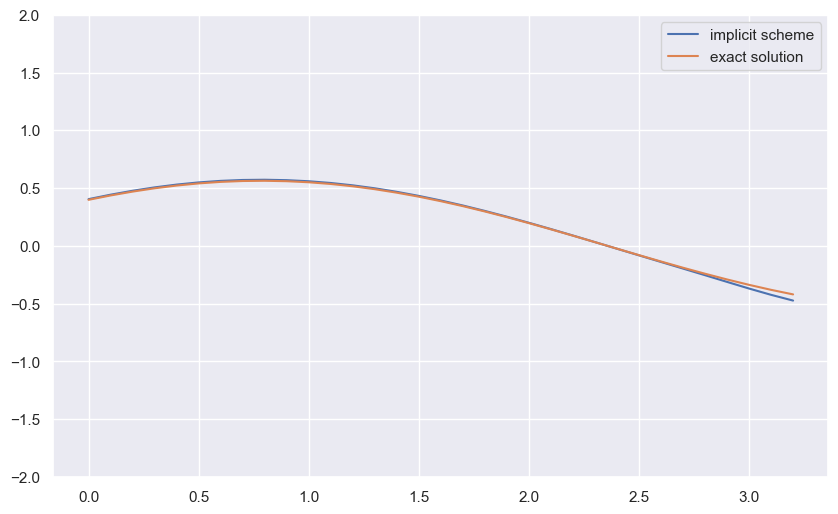

In [115]:
x = np.arange(x_begin, x_end + h, h)
t = np.arange(t_begin, t_end + tau, tau)

fig, axs = plt.subplots(figsize=(10, 6))

i = 10
line1, = axs.plot(x, u_implicit[i, :], label="implicit scheme")
line3, = axs.plot(x, u_exact[i, :], label="exact solution")

plt.ylim(-2, 2)
plt.legend()

### Полученные результаты


In [116]:
def print_errors(method):

    params = {
        'order': [1, 2],
        'type': [(2, 1), (3, 2), (2, 2)]
    }

    for order in params['order']:
        for type in params['type']:
            if method == 'explicit':
                u = explicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_1, order, type)
            if method == 'implicit':
                u = implicit_scheme(x_begin, x_end, t_begin, t_end, h, tau, a, psi_1, psi_2, dd_psi_1, order, type)
            print(f"order: {order}, type: {type}")
            print(f"mean abs error = {mean_abs_error(u_exact, u)}")
            print(f"max abs error = {max_abs_error(u_exact, u)} \n")

In [117]:
print_errors('explicit')

order: 1, type: (2, 1)
mean abs error = 0.012262215806825797
max abs error = 0.07159339301525594 

order: 1, type: (3, 2)
mean abs error = 0.015031781985535488
max abs error = 0.09805116063141134 

order: 1, type: (2, 2)
mean abs error = 0.015346605256710878
max abs error = 0.1063006177128279 

order: 2, type: (2, 1)
mean abs error = 0.00457918011268383
max abs error = 0.04804364437521602 

order: 2, type: (3, 2)
mean abs error = 0.004755924087559251
max abs error = 0.0738926390306904 

order: 2, type: (2, 2)
mean abs error = 0.005081879246466819
max abs error = 0.0821771897408397 



In [118]:
print_errors('implicit')

order: 1, type: (2, 1)
mean abs error = 0.02070848061715565
max abs error = 0.10441928912834489 

order: 1, type: (3, 2)
mean abs error = 0.023869691257552252
max abs error = 0.132661227853418 

order: 1, type: (2, 2)
mean abs error = 0.023789738138745114
max abs error = 0.13570155755934765 

order: 2, type: (2, 1)
mean abs error = 0.010787657331342225
max abs error = 0.08127864127949438 

order: 2, type: (3, 2)
mean abs error = 0.013610239025257025
max abs error = 0.10885990151102184 

order: 2, type: (2, 2)
mean abs error = 0.013528987049670321
max abs error = 0.11187483885255622 

